In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import xgboost

In [5]:
train = pd.read_csv("E:\\Hackthon\\Black Friday Sale Prediction\\train.csv")
test = pd.read_csv("E:\\Hackthon\\Black Friday Sale Prediction\\test.csv")

train.shape, test.shape

((550068, 12), (233599, 11))

In [6]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
data = pd.concat([train,test],axis = 0)
data.shape

(783667, 12)

In [9]:
data = data.drop(['Product_ID','User_ID'],axis = 1)
data.shape

(783667, 10)

In [10]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [11]:
data.dtypes

Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Stay_In_Current_City_Years     object
dtype: object

In [12]:
data.isnull().sum()*100/len(data)

Age                            0.000000
City_Category                  0.000000
Gender                         0.000000
Marital_Status                 0.000000
Occupation                     0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
Stay_In_Current_City_Years     0.000000
dtype: float64

In [13]:
data.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(f"{data['Product_Category_3'].mean()}")
data['Product_Category_3'] = data['Product_Category_3'].fillna(f"{data['Product_Category_3'].mean()}")
data['Purchase'] = data['Purchase'].fillna(f"{data['Purchase'].mean()}")

In [15]:
data.isnull().sum()

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Stay_In_Current_City_Years    0
dtype: int64

In [16]:
for col in data.columns:
    print(col , ":", len(data[col].unique()),'label')

Age : 7 label
City_Category : 3 label
Gender : 2 label
Marital_Status : 2 label
Occupation : 21 label
Product_Category_1 : 20 label
Product_Category_2 : 18 label
Product_Category_3 : 16 label
Purchase : 18106 label
Stay_In_Current_City_Years : 5 label


In [17]:
for col in data.columns:
    if len(data[col].unique()) <25:
        print(col, "::\n\n",data[col].unique())

Age ::

 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category ::

 ['A' 'C' 'B']
Gender ::

 ['F' 'M']
Marital_Status ::

 [0 1]
Occupation ::

 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Product_Category_1 ::

 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 ::

 ['12.668604797820548' 6.0 14.0 2.0 8.0 15.0 16.0 11.0 5.0 3.0 4.0 12.0 9.0
 10.0 17.0 13.0 7.0 18.0]
Product_Category_3 ::

 ['12.668604797820548' 14.0 17.0 5.0 4.0 16.0 15.0 8.0 9.0 13.0 6.0 12.0
 3.0 18.0 11.0 10.0]
Stay_In_Current_City_Years ::

 ['2' '4+' '3' '1' '0']


In [18]:
data['Age'] = data['Age'].replace({'0-17' : '8.50',
                                  '55+' : '55',
                                  '26-35' : '30.5',
                                   '46-50' : '48.0',
                                   '51-55' : '78.50',
                                   '36-45' : '40.5',
                                   '18-25' : '30.5'
                                  })

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace({'4+' : '4'})
data['Product_Category_2'] = data['Product_Category_2'].replace({'12.668604797820548': '12'})
data['Product_Category_3'] = data['Product_Category_3'].replace({'12.668604797820548' : '12'})

In [19]:
data['Age'] = data['Age'].astype('float64')
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype('float64')
data['Purchase'] = data['Purchase'].astype('float64')

In [20]:
data.dtypes

Age                           float64
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2             object
Product_Category_3             object
Purchase                      float64
Stay_In_Current_City_Years    float64
dtype: object

## EDA

In [21]:
sns.set(style="darkgrid")

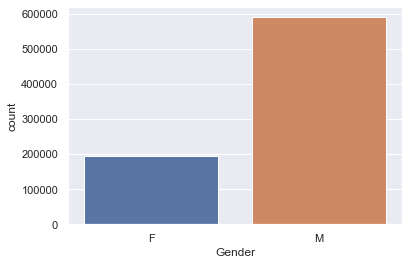

In [22]:
sns.countplot(x = 'Gender', data = data)

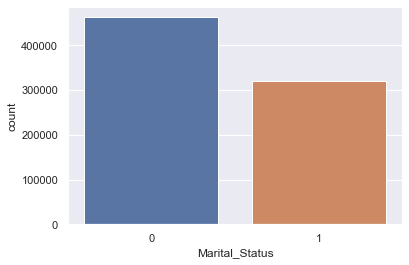

In [23]:
sns.countplot(x = 'Marital_Status', data = data)

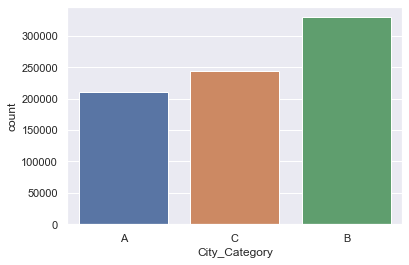

In [24]:
sns.countplot(x = 'City_Category', data = data)

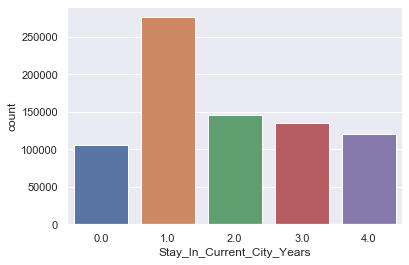

In [25]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = data)

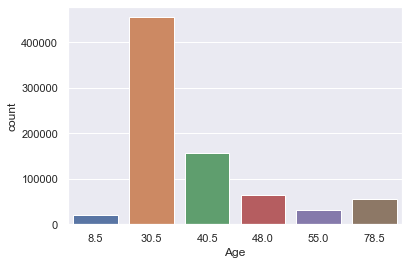

In [26]:
sns.countplot(x = 'Age', data = data)

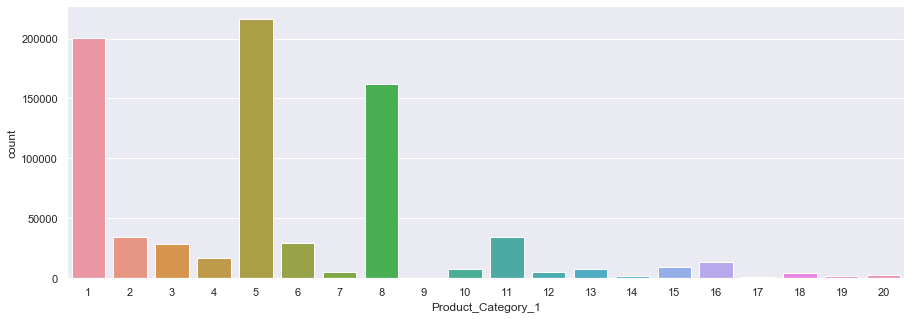

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Product_Category_1', data = data)

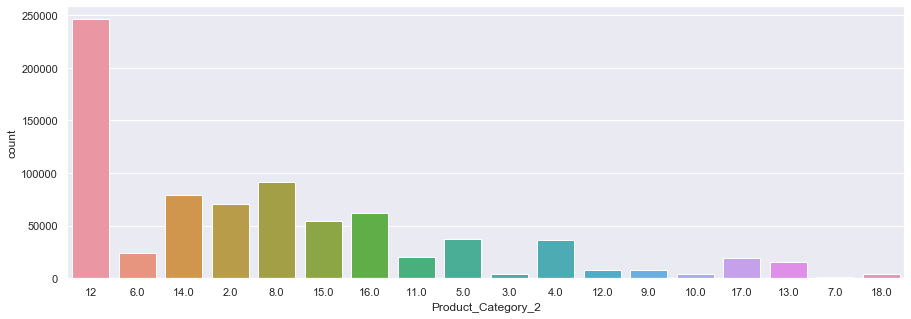

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Product_Category_2', data = data)

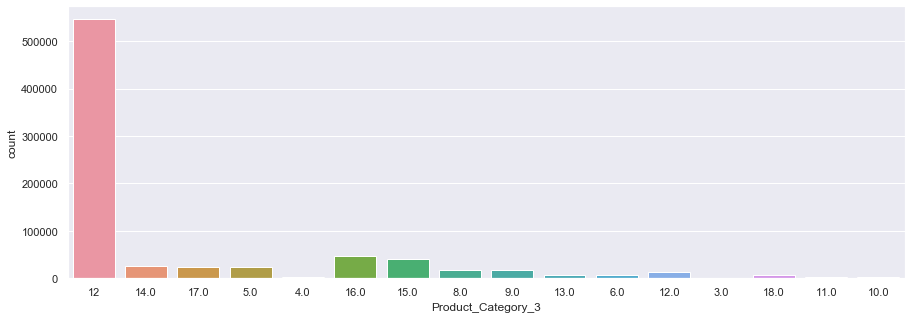

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Product_Category_3', data = data)

In [ ]:
data.hist(figsize=(15,10),layout=(4,3))

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(data.corr(),annot = True, fmt = '.1g', cmap= 'cool')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
sns.scatterplot(x = 'Marital_Status', y = 'Age', data = data)

In [ ]:
plt.figure(figsize = (10,8))
mask = np.tril(data.corr())
ax = sns.heatmap(data.corr(),annot = True, fmt = '.1g', cmap= 'cool', mask=mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
sns.boxplot(data.Age)

In [ ]:
sns.boxplot(data.Stay_In_Current_City_Years)

In [ ]:
sns.boxplot(data.Product_Category_1)

In [ ]:
sns.boxplot(data.Occupation)

In [ ]:
from scipy import stats
for feature in data.select_dtypes(exclude='object').columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()

In [ ]:
data['Gender'] = leb.fit_transform(data['Gender'])
data['City_Category'] = leb.fit_transform(data['City_Category'])

In [ ]:
data['Product_Category_2'] = data['Product_Category_2'].astype('str')
data['Product_Category_3'] = data['Product_Category_3'].astype('str')

In [ ]:
data['Product_Category_3'] = leb.fit_transform(data['Product_Category_3'])
data['Product_Category_2'] = leb.fit_transform(data['Product_Category_2'])

In [ ]:
data.head()

In [ ]:
X = data.drop("Purchase",axis = 1)
y = data["Purchase"][:len(train)]

X.shape, y.shape

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)

# transform training data
norm_data = pd.DataFrame(norm.transform(X), columns=X.columns)

In [ ]:
norm_data.head()

## Build Model

In [ ]:
from sklearn import  model_selection, linear_model, tree, ensemble, metrics 

In [ ]:
train = norm_data[:len(train)]
test = norm_data[len(train):]

train.shape, test.shape

In [ ]:
train['Purchase'] = y

In [ ]:
train.head()

In [ ]:
x = train.drop('Purchase',axis = 1)
y = train['Purchase']

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = .25)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

# Decision Tree

In [ ]:
model_DT = tree.DecisionTreeRegressor()
model_DT.fit(X_train,y_train)

In [ ]:
feat_importances = pd.Series(model_DT.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
model_DT = tree.DecisionTreeRegressor()
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)
MSE_DT = metrics.mean_squared_error(y_test,y_pred_DT)
RMSE_DT = np.sqrt(MSE_DT)
MAE_DT = metrics.mean_absolute_error(y_test,y_pred_DT)
print("Root Mean Squre Error : \n",RMSE_DT ,"\nMean Squre Error : \n", MSE_DT,
      "\nMean Absolute Error : \n", MAE_DT)

# Random Forest Regressor

In [ ]:
model_RFR = ensemble.RandomForestRegressor()
model_RFR.fit(X_train,y_train)
y_pred_RFR = model_RFR.predict(X_test)
MSE_RFR = metrics.mean_squared_error(y_test,y_pred_RFR)
RMSE_RFR = np.sqrt(MSE_RFR)
MAE_RFR = metrics.mean_absolute_error(y_test,y_pred_RFR)

In [ ]:
print("Root Mean Squre Error : \n",RMSE_RFR ,"\n Mean Squre Error : \n", MSE_RFR, "\nMean Absolute Error : \n", MAE_RFR)

# Linear Regression

In [ ]:
model_LR = linear_model.LinearRegression()
model_LR.fit(X_train,y_train)
y_pred_LR = model_LR.predict(X_test)
MSE_LR = metrics.mean_squared_error(y_test,y_pred_LR)
RMSE_LR = np.sqrt(MSE_LR)
MAE_LR = metrics.mean_absolute_error(y_test,y_pred_LR)

In [ ]:
print("Root Mean Squre Error : \n",RMSE_LR, "\nMean Squre Error : \n", MSE_LR, "\nMean Absolute Error : \n", MAE_LR)

# GradientBoostingRegressor

In [ ]:
model_xgb = ensemble.GradientBoostingRegressor()
model_xgb.fit(X_train,y_train)
y_pred_xgb = model_xgb.predict(X_test)
MSE_xgb = metrics.mean_squared_error(y_test,y_pred_xgb)
RMSE_xgb = np.sqrt(MSE_xgb)
MAE_xgb = metrics.mean_absolute_error(y_test,y_pred_xgb)

In [ ]:
print("Root Mean Squre Error : \n",RMSE_xgb, "\nMean Squre Error : \n", MSE_xgb, "\nMean Absolute Error : \n", MAE_xgb)

## XGBRegressor

In [ ]:
model_XGBR =xgboost.XGBRegressor(learning_rate=.99,objective='reg:squarederror', booster='dart')
model_XGBR.fit(X_train,y_train)
y_pred_XGBR = model_XGBR.predict(X_test)
MSE_XGBR = metrics.mean_squared_error(y_test,y_pred_XGBR)
RMSE_XGBR = np.sqrt(MSE_XGBR)
MAE_XGBR = metrics.mean_absolute_error(y_test,y_pred_XGBR)

In [ ]:
print("Root Mean Squre Error : \n",RMSE_XGBR, "\nMean Squre Error : \n", MSE_XGBR, "\nMean Absolute Error : \n", MAE_XGBR)

# Optimization

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node


# Create the random grid
param = {   'max_depth': range (2, 10, 1),
            'n_estimators': n_estimators,
            'learning_rate': np.arange(0.9,2,.2)
}
print(param)

In [ ]:
np.arange(0.9,2,.2)

In [ ]:
model_XGBR = xgboost.XGBRegressor(objective='reg:squarederror', booster='dart')
model_XGBR=RandomizedSearchCV(estimator=model_XGBR,param_distributions=param,n_iter=100,cv=5,verbose=1,
                               random_state=100,n_jobs=-1)
### fit the randomized model
model_XGBR.fit(X_train,y_train)

## Output

In [ ]:
out = pd.read_csv("E:\\Black Friday Sale Prediction\\sample_submission.csv")
out.columns

In [ ]:
out['Purchase'] = model_xgb.predict(test)

In [ ]:
out.to_csv("E:/sample_submission.csv")